In [606]:
%matplotlib inline

import sys
import warnings
import traceback

from pathlib import Path
import pickle
from types import SimpleNamespace
from joblib import delayed, Parallel
from importlib import reload


import numpy as np
import pandas as pd
import scipy.signal as signal
import scipy.stats as stats
from sklearn import linear_model as lm
from sklearn.decomposition import PCA, NMF, KernelPCA
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
sns.set(style='whitegrid', palette='muted')

import TreeMazeAnalyses2.Utils.robust_stats as rs
from TreeMazeAnalyses2.Analyses.subject_info import SubjectInfo, SubjectSessionInfo
from TreeMazeAnalyses2.Analyses import spatial_functions as spatial_funcs
import TreeMazeAnalyses2.Analyses.open_field_functions as of_funcs


In [2]:
rs = reload(rs)
spatial_funcs = reload(spatial_funcs)
of_funcs = reload(of_funcs)

In [3]:
subject_id = 'Li'
session = 'Li_OF_061218'
subject_info = SubjectInfo(subject_id)
#subject_info = SubjectInfo(subject_id, overwrite=True)
session_info = SubjectSessionInfo(subject_id,session)
track_params = SimpleNamespace(**session_info.task_params)
n_units = session_info.n_units
#print(session_info)
#session_info.print_task_params()


number of units in session 32


In [4]:
fr = session_info.get_fr()
spikes = session_info.get_binned_spikes()
of_dat = session_info.get_track_data()
of_dat = SimpleNamespace(**of_dat)

# Get metrics

In [9]:
spatial_funcs = reload(spatial_funcs)
sm = spatial_funcs.SpatialMetrics(x=of_dat.x, y=of_dat.y, speed=of_dat.sp, ha=of_dat.ha, hd=of_dat.hd, fr=fr, spikes=spikes, n_jobs=10) 

In [736]:
%%time
spatial_funcs = reload(spatial_funcs)
sm = spatial_funcs.SpatialMetrics(x=of_dat.x, y=of_dat.y, speed=of_dat.sp, ha=of_dat.ha, hd=of_dat.hd, fr=fr, spikes=spikes, n_jobs=10) 
sm.get_all_metrics()

Speed Score Completed: 15.39s
Head Dir Score Completed: 7.24s
Head Ang Score Completed: 6.88s
Border Score Completed: 12.79s
Grid Score Completed: 9.18s
Spatial Stability Score Completed: 8.08s
CPU times: user 1min 32s, sys: 4.84 s, total: 1min 37s
Wall time: 59.7 s


,speed_score,speed_sig,hd_score,hd_ang,hd_sig,ha_score,ha_ang,ha_sig,border_score,border_sig,grid_score,grid_sig,grid_scale,grid_phase,stability_corr,stability_sig
0,-0.067004,True,0.0439832,1.97064,False,0.294311,3.76042,True,0.491291,True,NaN,False,NaN,NaN,0.589854,True
1,0.079552,True,0.141234,0.754557,True,0.406435,3.68146,True,0.297186,False,NaN,False,NaN,NaN,0.311210,False
2,-0.025491,True,0.321559,1.52139,True,0.6143,4.05373,True,0.306903,False,NaN,False,NaN,NaN,0.396179,False
3,0.105304,True,0.11229,2.1556,True,0.295191,4.10225,False,0.422533,False,NaN,False,NaN,NaN,0.390435,False
4,-0.198898,True,0.330249,0.136907,True,0.883557,3.19459,True,0.313315,False,-0.003799,False,41.601919,1.170169,0.445445,False
5,-0.045359,True,0.336173,2.95688,True,0.33288,4.7314,True,0.510863,False,-0.259110,False,30.739329,1.411547,0.549258,False
6,-0.048229,False,0.299722,6.01634,True,0.562506,3.03434,True,0.444437,False,NaN,False,NaN,NaN,0.708243,True
7,0.152840,True,0.238859,2.15285,True,0.39458,4.15695,True,0.428737,False,NaN,False,NaN,NaN,0.386660,False
8,-0.016303,True,0.0867761,2.85956,True,0.253968,3.84243,True,-0.157228,False,0.139162,False,33.978937,0.191961,0.496063,False
9,-0.052505,True,0.094004,3.43103,True,0.2489,3.96339,True,0.423204,False,NaN,False,NaN,NaN,0.654777,False


In [12]:
sm.all_scores[sm.all_scores['stability_sig']]

,speed_score,speed_sig,hd_score,hd_ang,hd_sig,ha_score,ha_ang,ha_sig,border_score,border_sig,grid_score,grid_sig,grid_scale,grid_phase,stability_corr,stability_sig
0,-0.067004,True,0.0439832,1.97064,True,0.294311,3.76042,True,0.491291,False,NaN,False,NaN,NaN,0.589854,True
6,-0.048229,False,0.299722,6.01634,True,0.562506,3.03434,True,0.444437,False,NaN,False,NaN,NaN,0.708243,True
10,-0.029752,True,0.0995149,2.28002,True,0.360087,3.83025,True,0.540153,True,-0.223051,False,40.885665,0.88919,0.758445,True
24,0.070979,True,0.0609399,3.97861,True,0.251621,3.46898,True,0.113705,False,0.133246,False,26.219908,0.53476,-0.075011,True


In [50]:
# 
sm.get_speed_score()

,speed_score,speed_sig
0,-0.067004,True
1,0.079552,True
2,-0.025491,True
3,0.105304,True
4,-0.198898,True
5,-0.045359,True
6,-0.048229,False
7,0.152840,True
8,-0.016303,True
9,-0.052505,True


In [29]:
sm.get_hd_score()

,hd_score,hd_ang,hd_sig
0,0.0439832,1.97064,True
1,0.141234,0.754557,True
2,0.321559,1.52139,True
3,0.11229,2.1556,True
4,0.330249,0.136907,True
5,0.336173,2.95688,True
6,0.299722,6.01634,True
7,0.238859,2.15285,True
8,0.0867761,2.85956,True
9,0.094004,3.43103,True


In [31]:
sm.get_ha_score()

,ha_score,ha_ang,ha_sig
0,0.294311,3.76042,True
1,0.406435,3.68146,True
2,0.6143,4.05373,True
3,0.295191,4.10225,True
4,0.883557,3.19459,True
5,0.33288,4.7314,True
6,0.562506,3.03434,True
7,0.39458,4.15695,True
8,0.253968,3.84243,True
9,0.2489,3.96339,True


In [45]:
sm.get_border_score()

,border_score,border_sig
0,0.491291,0.0
1,0.297186,0.0
2,0.306903,0.0
3,0.422533,0.0
4,0.313315,0.0
5,0.510863,0.0
6,0.444437,0.0
7,0.428737,0.0
8,-0.157228,0.0
9,0.423204,0.0


In [56]:
spatial_funcs = reload(spatial_funcs)
sm.get_grid_score()

,grid_score,grid_sig,grid_scale,grid_phase
0,NaN,0.0,NaN,NaN
1,NaN,0.0,NaN,NaN
2,NaN,0.0,NaN,NaN
3,NaN,0.0,NaN,NaN
4,-0.003799,0.0,41.601919,1.170169
5,-0.259110,0.0,30.739329,1.411547
6,NaN,0.0,NaN,NaN
7,NaN,0.0,NaN,NaN
8,0.139162,1.0,33.978937,0.191961
9,NaN,0.0,NaN,NaN


In [40]:
%%time
spatial_funcs = reload(spatial_funcs)
sm.get_spatial_stability()

CPU times: user 3.03 s, sys: 300 ms, total: 3.33 s
Wall time: 7.86 s


,stability_corr,stability_sig
0,0.589854,1.0
1,0.311210,0.0
2,0.396179,0.0
3,0.390435,0.0
4,0.445445,0.0
5,0.549258,0.0
6,0.708243,1.0
7,0.386660,0.0
8,0.496063,0.0
9,0.654777,0.0


In [44]:
spatial_funcs = reload(spatial_funcs)
spatial_funcs.permutation_test_border_score(fr, sm.fr_maps, sm.x, sm.y, x_bin_edges=sm.x_bin_edges_, y_bin_edges=sm.y_bin_edges_, n_perm=50, sig_alpha=0.02, true_bs=None, n_jobs=1, **sm.border_score_params__)

(array([ 0.4912907 ,  0.29718623,  0.30690263,  0.42253297,  0.31331537,
         0.51086284,  0.44443678,  0.42873698, -0.1572282 ,  0.42320435,
         0.54015253,  0.51689556,  0.44874083,  0.45493814,  0.43365758,
         0.260754  ,  0.02855463,  0.05826864,  0.45684436,  0.07690082,
         0.49727725,  0.21759944,  0.46354815, -0.10639375,  0.11370455,
         0.48328653,  0.3969232 ,  0.39839812,  0.44599486,  0.42653582,
         0.36638435,  0.43396779]),
 array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]))

In [18]:
sm.all_scores.to_csv('temp.csv')

In [21]:
pd.read_csv('temp.csv', index_col=0)

,speed_score,speed_sig,hd_score,hd_ang,hd_sig,ha_score,ha_ang,ha_sig,border_score,border_sig,grid_score,grid_sig,grid_scale,grid_phase,stability_corr,stability_sig
0,-0.067004,True,0.043983,1.970636,False,0.294311,3.760421,True,0.491291,False,NaN,False,NaN,NaN,0.589854,False
1,0.079552,True,0.141234,0.754557,True,0.406435,3.681458,True,0.297186,False,NaN,False,NaN,NaN,0.311210,False
2,-0.025491,True,0.321559,1.521387,True,0.614300,4.053728,True,0.306903,False,NaN,False,NaN,NaN,0.396179,False
3,0.105304,True,0.112290,2.155601,True,0.295191,4.102252,False,0.422533,False,NaN,False,NaN,NaN,0.390435,False
4,-0.198898,True,0.330249,0.136907,True,0.883557,3.194585,True,0.313315,False,-0.003799,False,41.601919,1.170169,0.445445,False
5,-0.045359,True,0.336173,2.956877,True,0.332880,4.731395,True,0.510863,False,-0.259110,False,30.739329,1.411547,0.549258,False
6,-0.048229,False,0.299722,6.016342,True,0.562506,3.034343,True,0.444437,False,NaN,False,NaN,NaN,0.708243,True
7,0.152840,True,0.238859,2.152846,True,0.394580,4.156953,True,0.428737,False,NaN,False,NaN,NaN,0.386660,False
8,-0.016303,True,0.086776,2.859555,True,0.253968,3.842427,True,-0.157228,False,0.139162,True,33.978937,0.191961,0.496063,False
9,-0.052505,True,0.094004,3.431032,True,0.248900,3.963392,True,0.423204,False,NaN,False,NaN,NaN,0.654777,False


# Encoding models

In [6]:
fr = session_info.get_fr()
spikes = session_info.get_binned_spikes()
of_dat = session_info.get_track_data()
of_dat = SimpleNamespace(**of_dat)
x = of_dat.x
y = of_dat.y
sp = of_dat.sp
hd = of_dat.hd

def perf2df(perf):
    metrics = list(perf.keys())
    n_metrics = len(metrics)
    n_xval = perf[metrics[0]].shape[0]
    n_units = perf[metrics[0]].shape[1]
    
    
    out = pd.DataFrame(columns=['unit_id', 'k_fold', 'metric', 'value'])
    cnt = 0
    for metric in metrics:
        vals = perf[metric]
        for unit in range(n_units):
            for k in range(n_xval):
                out.at[cnt,'metric'] =  metric
                out.at[cnt,'unit_id'] = unit
                out.at[cnt,'k_fold'] = k
                out.at[cnt,'value'] = vals[k, unit]
                cnt+=1
    return out


In [13]:
%%time
spatial_funcs = reload(spatial_funcs)
c, train_perf, test_perf =spatial_funcs.get_speed_encoding_model(of_dat.sp, fr, track_params.sp_bin_edges_, data_type='fr', n_xval=5)
#c, train_perf, test_perf = spatial_funcs.get_speed_encoding_model(of_dat.sp, spikes, track_params.sp_bin_edges_, data_type='spikes', n_xval=5)

train_perf2 = perf2df(train_perf)
train_perf2['split'] = 'train'
test_perf2 = perf2df(test_perf)
test_perf2['split'] = 'test'

speed_perf = pd.concat((train_perf2, test_perf2))
speed_perf['model'] = 'speed' 

CPU times: user 26.5 s, sys: 561 ms, total: 27.1 s
Wall time: 3.25 s


In [87]:
train_perf['r2'].mean(axis=0)

array([ 0.02708262, -0.09837925, -0.19890138, -0.23869268, -0.1569225 ,
       -0.22755434,  0.00915908, -0.36643508, -1.69189153, -0.35397679,
       -0.32463224, -0.83423804, -0.19341314,  0.00850556, -0.29394494,
       -0.45973063, -1.86968081, -0.07605555, -0.05144568, -0.09208736,
        0.01917877, -0.09635352, -0.04797889, -0.02818287, -1.60094013,
       -0.20914536, -0.17711316,  0.03338576, -0.01176656, -0.26831289,
       -1.16312203, -0.02897667])

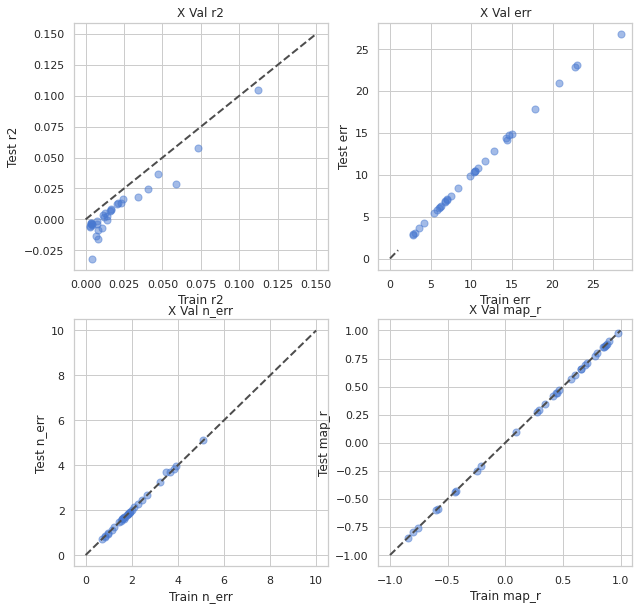

In [14]:
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[-1, 1] }

for ii, metric in enumerate(metrics):
    
    ax[ii].scatter(train_perf[metric].mean(axis=0), test_perf[metric].mean(axis=0), s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)

 

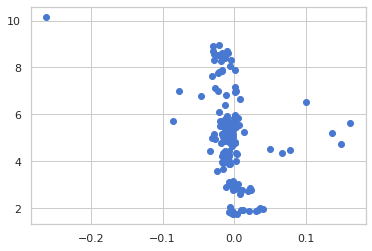

In [44]:
x_var = perf[ (perf['metric']=='r2') & (perf['split']=='test')]['value']
y_var = perf[ (perf['metric']=='n_err') & (perf['split']=='test')]['value']
fold =  perf[ (perf['metric']=='map_r') & (perf['split']=='test')]['k_fold']
plt.scatter(x_var, y_var)

### Head direction

In [16]:
%%time
spatial_funcs = reload(spatial_funcs)
c, train_perf, test_perf =spatial_funcs.get_angle_encoding_model(hd, fr, track_params.ang_bin_edges_, speed=sp, 
                                                                 min_speed=track_params.min_speed_thr, max_speed=track_params.max_speed_thr, 
                                                                 data_type='fr', n_xval=5)
# c, train_perf, test_perf =spatial_funcs.get_angle_encoding_model(hd, spikes, track_params.ang_bin_edges_, speed=sp, 
#                                                                  min_speed=track_params.min_speed_thr, max_speed=track_params.max_speed_thr, 
#                                                                  data_type='spikes', n_xval=5)
train_perf2 = perf2df(train_perf)
train_perf2['split'] = 'train'
test_perf2 = perf2df(test_perf)
test_perf2['split'] = 'test'

hd_perf = pd.concat((train_perf2, test_perf2))
hd_perf['model'] = 'hd' 

CPU times: user 24.9 s, sys: 561 ms, total: 25.4 s
Wall time: 3.14 s


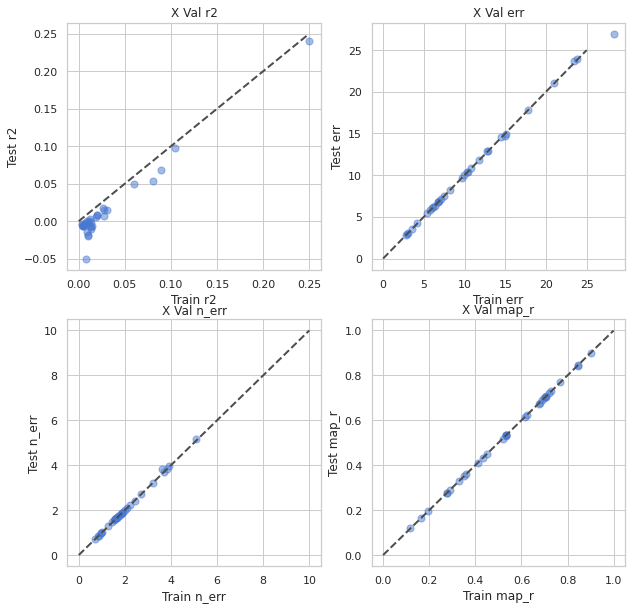

In [19]:
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.25], 'err': [0, 25], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    
    ax[ii].scatter(train_perf[metric].mean(axis=0), test_perf[metric].mean(axis=0), s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)


### Border Score

In [20]:
%%time
spatial_funcs = reload(spatial_funcs)
c, train_perf, test_perf =spatial_funcs.get_border_encoding_model(x, y, spikes, track_params.x_bin_edges_, track_params.y_bin_edges_,  
                                                                  data_type='spikes', n_xval=5)
# c, train_perf, test_perf =spatial_funcs.get_border_encoding_model(x, y, spikes, track_params.x_bin_edges_, track_params.y_bin_edges_,  
#                                                                   data_type='spikes', n_xval=5)
train_perf2 = perf2df(train_perf)
train_perf2['split'] = 'train'
test_perf2 = perf2df(test_perf)
test_perf2['split'] = 'test'

border_perf = pd.concat((train_perf2, test_perf2))
border_perf['model'] = 'border' 

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


CPU times: user 45.2 s, sys: 784 ms, total: 46 s
Wall time: 5.25 s


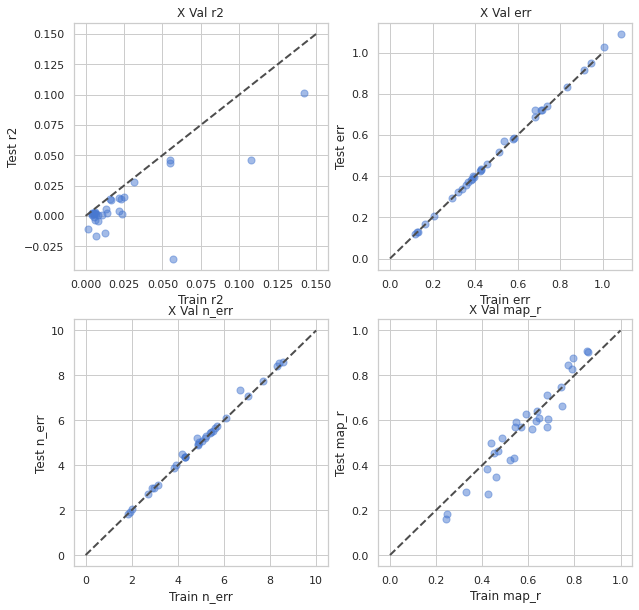

In [21]:
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    
    ax[ii].scatter(train_perf[metric].mean(axis=0), test_perf[metric].mean(axis=0), s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)

### Grids

In [89]:
%%time
spatial_funcs = reload(spatial_funcs)
c, train_perf, test_perf =spatial_funcs.get_grid_encoding_model(x, y, fr, track_params.x_bin_edges_, track_params.y_bin_edges_, data_type='fr', n_xval=5)

# c, train_perf, test_perf =spatial_funcs.get_grid_encoding_model(x, y, spikes, track_params.x_bin_edges_, track_params.y_bin_edges_, data_type='spikes', n_xval=5)

train_perf2 = perf2df(train_perf)
train_perf2['split'] = 'train'
test_perf2 = perf2df(test_perf)
test_perf2['split'] = 'test'

grid_perf = pd.concat((train_perf2, test_perf2))
grid_perf['model'] = 'grid' 

CPU times: user 1min 36s, sys: 3.01 s, total: 1min 39s
Wall time: 41.7 s


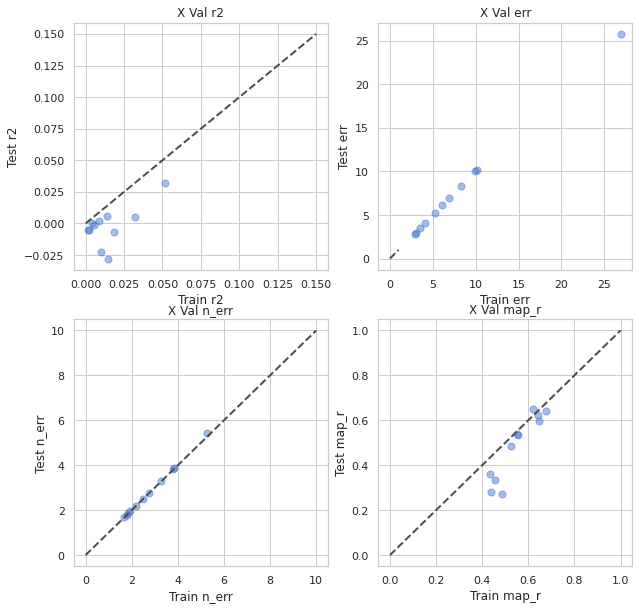

In [92]:
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    
    ax[ii].scatter(train_perf[metric].mean(axis=0), test_perf[metric].mean(axis=0), s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)
    

### Full position model

In [101]:
%%time
spatial_funcs = reload(spatial_funcs)
#c, train_perf, test_perf =spatial_funcs.get_position_encoding_model(x, y, spikes, track_params.x_bin_edges_, track_params.y_bin_edges_, data_type='spikes', n_xval=5)
c, train_perf, test_perf = spatial_funcs.get_position_encoding_model(x, y, fr, track_params.x_bin_edges_, track_params.y_bin_edges_, data_type='fr', n_xval=5)


train_perf2 = perf2df(train_perf)
train_perf2['split'] = 'train'
test_perf2 = perf2df(test_perf)
test_perf2['split'] = 'test'

pos_perf = pd.concat((train_perf2, test_perf2))
pos_perf['model'] = 'pos' 

CPU times: user 17min 12s, sys: 19.8 s, total: 17min 31s
Wall time: 2min 24s


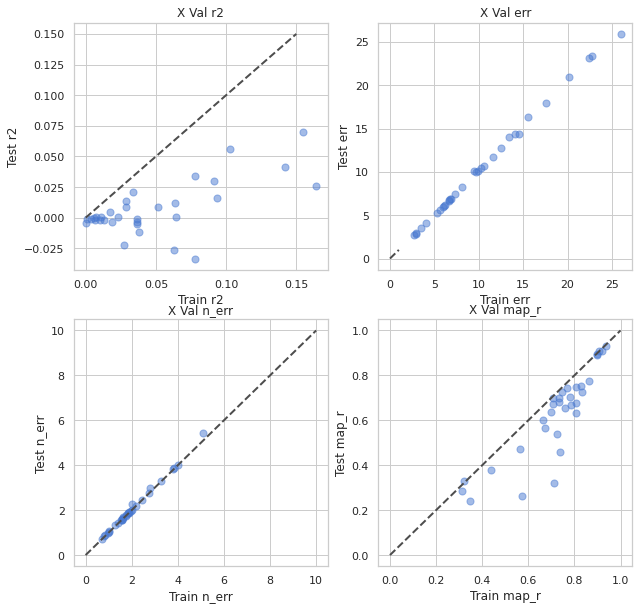

In [102]:
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    
    ax[ii].scatter(train_perf[metric].mean(axis=0), test_perf[metric].mean(axis=0), s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)
    

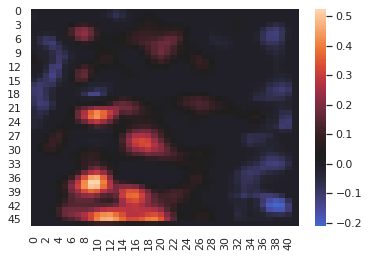

In [105]:
unit = 1
c_map = c.mean(axis=0)[unit,1:].reshape(47,-1)
sns.heatmap(c_map, center= c_map.mean())

In [30]:
x_bin_edges = track_params.x_bin_edges_
y_bin_edges = track_params.y_bin_edges_
pos_features = spatial_funcs.get_position_encoding_features(x, y, x_bin_edges, y_bin_edges)

### modification of encoding features

In [734]:
rs = reload(rs)
from TreeMazeAnalyses2.Analyses.spatial_functions import gaussian_2d, spikes_2_rate_map, firing_rate_2_rate_map

def get_position_encoding_features(x, y, x_bin_edges, y_bin_edges, feature_design_matrix=None, 
                                   spatial_window_size=5, spatial_sigma=2, 
                                   feat_type='pca', n_components=100, 
                                   nmf=None, pca=None, kpca=None):
    """
    for each sample, creates a 1d feature array that is smoothed around the position of the animal
    :param x: array of x positions [n_samps length]
    :param y: array of y positions [n_smaps length]
    :param x_bin_edges: edges of x array
    :param y_bin_edges: edges of y array
    :param spatial_window_size: int, spatial extent of smoothing for features
    :param spatial_sigma: float, spatial std. for gaussian smoothing
    :return: array [n_samps x n_feautures].
        n features is the product of x and y bins
    """

    n_samps = len(x)

    n_x_bins = len(x_bin_edges) - 1
    n_y_bins = len(y_bin_edges) - 1
    n_spatial_bins = n_x_bins * n_y_bins
    
    # obtain feature matrix for
    if feat_type in ['nmf', 'pca', 'kpca', 'spline']:
        if feature_design_matrix is None:
            feature_design_matrix = generate_position_design_matrix(x_bin_edges, y_bin_edges, 
                                                        spatial_window_size=spatial_window_size, spatial_sigma=spatial_sigma)
        else:
            assert feature_design_matrix.shape[0]==n_spatial_bins, 'Feature Matrix does not match given inputs.'

    # get x y bin idx
    x_bin = np.digitize(x, x_bin_edges) - 1
    y_bin = np.digitize(y, y_bin_edges) - 1

    # for each sample get the linear bin idx of the xy bins 
    yx_bin = np.ravel_multi_index(np.array((y_bin, x_bin)), (n_y_bins, n_x_bins))

    # get features
    if feat_type == 'pca':
        transform_func, inverse_func, _ = pca_position_features(feature_design_matrix, n_components, pca)
        features = transform_func(yx_bin)
    
        return features, inverse_func
    
    elif feat_type == 'nmf':
        transform_func, inverse_func, _ = nmf_position_features(feature_design_matrix, n_components, nmf)
        features = transform_func(yx_bin)
        
        return features, inverse_func
    
    elif feat_type == 'kpca':
        transform_func, inverse_func, _ = kpca_position_features(feature_design_matrix, n_components, kpca)
        features = transform_func(yx_bin)

        return features, inverse_func
    
    elif feat_type == 'full':
        features = feature_design_matrix[yx_bin]
        return features, None
    
    elif feat_type == 'sparse':
        features = np.zeros((n_samps, n_spatial_bins))
        features[:,yx_bin] = 1    
        return features, None
    
    elif feat_type == 'splines':
        raise NotImplementedError
    
    else:
        raise NotImplementedError
    
def get_position_encoding_model(x, y, neural_data, x_bin_edges, y_bin_edges, data_type='spikes', bias_term=True,
                                regression_penalty='auto', n_xval=5, feature_design_matrix = None, 
                                spatial_window_size=5, spatial_sigma=2, feat_type='pca', **kwargs):
    """
    Discretizes x y positions into binned features to predict firing rate or spikes.
    :param x: array of x positions [n_samps length]
    :param y: array of y positions [n_smaps length]
    :param x_bin_edges: edges of x array
    :param y_bin_edges: edges of y array
    :param neural_data: array floats firing rate n_units x n_samps, also works for one unit
    :param data_type: string ['spikes', 'neural_data'], indicating if the data is firing rate or spike rate.
    :param bias_term: adds a column of 1s to the features
    :param regression_penalty: 'auto' or float. if auto, uses the np.log(n_features).
    :param n_xval: number of x validation folds
    :param spatial_window_size: int, spatial extent of smoothing for features
    :param spatial_sigma: float, spatial std. for gaussian smoothing
    :returns:
        model_coef: array n_xval x n_units x n_position_featurs
        train_perf: array n_xval x n_units x 3 [r2, err, map_corr]
        test_perf: array n_xval x n_units x 3
    """
    
    n_samps = len(x)

    if neural_data.ndim == 1:
        n_units = 1
        neural_data = neural_data[np.newaxis,]
    else:
        n_units, _ = neural_data.shape
    assert n_samps == neural_data.shape[1], 'Mismatch lengths between speed and neural_data.'

    # split data into folds
    xval_samp_ids = rs.split_timeseries(n_samps=n_samps, samps_per_split=1000, n_data_splits=n_xval)

    # get feature design matrix
    nmf=kwargs['nmf'] if ('nmf' in kwargs.keys()) else None    
    pca=kwargs['pca'] if ('pca' in kwargs.keys()) else None
    kpca=kwargs['kpca'] if ('kpca' in kwargs.keys()) else None
    n_comp=kwargs['n_comp'] if ('n_comp' in kwargs.keys()) else None
        
    features, inverse = get_position_encoding_features(x, y, x_bin_edges, y_bin_edges, 
                                                       spatial_window_size=spatial_window_size, spatial_sigma=spatial_sigma,
                                                       feature_design_matrix=feature_design_matrix, 
                                                       feat_type=feat_type, nmf=nmf, pca=pca, kpca=kpca, n_components=n_comp)

    n_features = features.shape[1]
    n_pos_bins = (len(x_bin_edges)-1) * (len(y_bin_edges)-1)

    # get penalty
    if regression_penalty == 'auto':
        alpha = 0.1
    elif isinstance(regression_penalty, float):
        alpha = regression_penalty
    else:
        print(f"Regression must be a float, or 'auto', provided type {type(regression_penalty)}")
        raise TypeError

    # obtain relevant functions for data type
    if data_type == 'spikes':
        def spatial_map_function(_spikes, _x, _y):
            out_map = spikes_2_rate_map(_spikes, _x, _y,
                                        x_bin_edges=x_bin_edges, y_bin_edges=y_bin_edges,
                                        spatial_window_size=spatial_window_size, spatial_sigma=spatial_sigma)
            return out_map

        model_function = lm.PoissonRegressor(alpha=0.1, fit_intercept=bias_term, max_iter=50)
        reg_type = 'poisson'
    elif data_type == 'fr':
        def spatial_map_function(_fr, _x, _y):
            out_map = firing_rate_2_rate_map(_fr, _x, _y,
                                             x_bin_edges=x_bin_edges, y_bin_edges=y_bin_edges,
                                             spatial_window_size=spatial_window_size, spatial_sigma=spatial_sigma)
            return out_map

        #model_function = lm.RidgeCV(fit_intercept=False)
        #model_function = lm.Ridge(alpha=alpha, fit_intercept=bias_term)
        #model_function = lm.LinearRegression(fit_intercept=bias_term)
        #model_function = lm.ElasticNetCV(n_alphas=10, l1_ratio=[0.05, 0.1, 0.25, 0.5], fit_intercept=False)
        model_function = lm.ElasticNet(alpha=alpha, l1_ratio=0.15, fit_intercept=bias_term)
        #model_function = lm.Lars(fit_intercept=False)
        #model_function = lm.BayesianRidge(fit_intercept=False)
        
        reg_type = 'linear'
    else:
        raise NotImplementedError

    # pre-allocate performance metrics
    perf_metrics = ['r2', 'ar2', 'err', 'n_err', 'map_r']
    train_perf = {}
    test_perf = {}
    for mm in perf_metrics:
        train_perf[mm] = np.zeros((n_xval, n_units))*np.nan
        test_perf[mm] = np.zeros((n_xval, n_units))*np.nan
    model_coef = np.zeros((n_xval, n_units, n_pos_bins)) 

    # iterate over x validation folds
    for fold in range(n_xval):
        # test set
        x_test = x[xval_samp_ids == fold]
        y_test = y[xval_samp_ids == fold]
        features_test = features[xval_samp_ids == fold, :]
        #features_test[:, bias:] = np.apply_along_axis(rs.zscore,0, features_test[:,bias:])

        # train set
        x_train = x[xval_samp_ids != fold]
        y_train = y[xval_samp_ids != fold]
        features_train = features[xval_samp_ids != fold, :]
        
        #features_train[:, bias:] = np.apply_along_axis(rs.zscore,0, features_train[:,bias:])

        for unit in range(n_units):
            try:
                # get responses
                response_test = neural_data[unit, xval_samp_ids == fold]
                response_train = neural_data[unit, xval_samp_ids != fold]

                # train model
                model = model_function.fit(features_train, response_train)
                if feat_type in ['pca', 'nmf', 'kpca']:
                    model_coef[fold, unit] = inverse(model.coef_)
                else:
                    model_coef[fold, unit] = model.coef_

                # get predicted responses
                response_train_hat = model.predict(features_train)
                response_test_hat = model.predict(features_test)

                # get true spatial for this fold maps
                train_map = spatial_map_function(response_train, x_train, y_train)
                test_map = spatial_map_function(response_test, x_test, y_test)

                # get predicted maps
                train_map_hat = spatial_map_function(response_train_hat, x_train, y_train)
                test_map_hat = spatial_map_function(response_test_hat, x_test, y_test)

                # train performance
                temp1 = rs.get_regression_metrics(response_train, response_train_hat, reg_type=reg_type,
                                                  n_params=n_features)

                train_perf['map_r'][fold, unit] = rs.pearson(train_map.flatten(), train_map_hat.flatten())

                # test performance
                temp2 = rs.get_regression_metrics(response_test, response_test_hat, reg_type=reg_type,
                                                  n_params=n_features)
                test_perf['map_r'][fold, unit] = rs.pearson(test_map.flatten(), test_map_hat.flatten())

                for metric in ['r2', 'ar2', 'err', 'n_err']:
                    train_perf[metric][fold, unit] = temp1[metric]
                    test_perf[metric][fold, unit] = temp2[metric]
            
            finally:
                pass
            
    return model_coef, train_perf, test_perf

In [720]:
def generate_position_design_matrix(n_x_bins, n_y_bins, spatial_window_size=5, spatial_sigma=2):
    """
    for a given geomtry generates an n_bins x n_bins F matrix, in which F[kk] is the kth row corresponding to a
    jj, ii position and applying a gaussian around that jj, ii position.
    :param n_x_bins: edges of x array
    :param n_y_bins: edges of y array
    :param spatial_window_size: int, spatial extent of smoothing for features
    :param spatial_sigma: float, spatial std. for gaussian smoothing
    :return: array [n_features x n_feautures].
        n features is the product of x and y bins
    """

    n_spatial_bins = n_x_bins * n_y_bins

    # get smoothing gaussian kernel. this is applied to each spatial position
    gaussian_coords = np.array((np.arange(-spatial_window_size, spatial_window_size + 1),
                                np.arange(-spatial_window_size, spatial_window_size + 1)))
    xx, yy = np.meshgrid(*gaussian_coords)
    gaussian_vals = gaussian_2d(x=xx, y=yy, sx=spatial_sigma, sy=spatial_sigma)
    gaussian_vals /= gaussian_vals.max()
    gaussian_vals = gaussian_vals.flatten()

    feature_matrix = np.zeros((n_spatial_bins, n_spatial_bins))
    for jj in range(n_y_bins):
        for ii in range(n_x_bins):
            # find where position is in the 1d feature dimension
            linear_jjii = np.ravel_multi_index(np.array((jj, ii)), (n_y_bins, n_x_bins))

            # positions around jj, ii
            jjii_coords = np.array((np.arange(jj - spatial_window_size, jj + spatial_window_size + 1),
                                   np.arange(ii - spatial_window_size, ii + spatial_window_size + 1)))

            jjii_mesh = np.meshgrid(*jjii_coords)
            # get valid coords.
            valid_coords = ((jjii_mesh[0]>=0) & (jjii_mesh[0]<n_y_bins)) & ((jjii_mesh[1]>=0) & (jjii_mesh[1]<n_x_bins))
            valid_coords = valid_coords.flatten()

            # convert those position to 1d feature dimension
            feature_idx = np.ravel_multi_index(jjii_mesh, (n_y_bins, n_x_bins),mode='clip').flatten()

            feature_matrix[linear_jjii, feature_idx[valid_coords]] = gaussian_vals[valid_coords]
    
    return feature_matrix

def pca_position_features(feature_matrix, pct_variance=0.95, pca=None):
    if pca is None:
        pca = PCA(n_components=pct_variance)
        pca.fit(feature_matrix)

    def transform(feature_linear_idx):
        # linear feature idx to component_space features
        return pca.transform(feature_matrix[feature_linear_idx])
    
    def inverse_transform(component_features):
        # component_space features to original space 
        return pca.inverse_transform(component_features)
   
    return transform, inverse_transform, pca
      
def nmf_position_features(feature_matrix, n_components=100, nmf=None):
    if nmf is None:
        nmf = NMF(n_components=n_components, alpha=0.01, init='nndsvda', max_iter=500)
        nmf.fit(feature_matrix)
    
    def transform(feature_linear_idx):
        # linear feature idx to component_space features
        return nmf.transform(feature_matrix[feature_linear_idx])
    
    def inverse_transform(component_features):
        # component_space features to original space 
        return nmf.inverse_transform(component_features)
   
    return transform, inverse_transform, nmf

def kpca_position_features(feature_matrix, n_components=100, kpca=None):
    if kpca is None:
        kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True, n_jobs=-1)
        kpca.fit(feature_matrix)

    def transform(feature_linear_idx):
        # linear feature idx to component_space features
        return kpca.transform(feature_matrix[feature_linear_idx])
    
    def inverse_transform(component_features):
        # component_space features to original space 
        return kpca.inverse_transform(component_features)
   
    return transform, inverse_transform, kpca


## get features and feature compressions

In [721]:
%%time
n_x_bins = len(x_bin_edges)-1
n_y_bins = len(y_bin_edges)-1

#feat_mat = generate_position_features(x_bin_edges, y_bin_edges, spatial_window_size=5, spatial_sigma=2)
feature_design_mat = generate_position_design_matrix(n_x_bins, n_y_bins, spatial_window_size=3)
pca_transform_func, pca_inverse_func, pca = pca_position_features(feature_design_mat)

CPU times: user 16 s, sys: 340 ms, total: 16.4 s
Wall time: 1.77 s


In [707]:
nmf_transform_func, nmf_inverse_func, nmf = nmf_position_features(feature_design_mat)

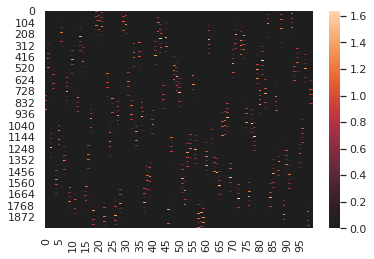

In [708]:
sns.heatmap(nmf.components_.T, center = 0)

In [735]:
pca.

True

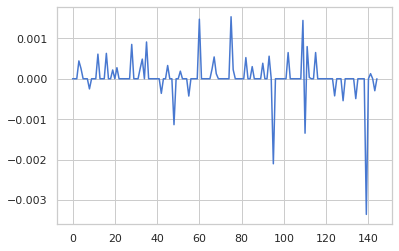

In [722]:
plt.plot(np.mean(pca.components_,axis=1))

## Compare results modeling of spikes/fr and different feature compression types.

In [669]:
out = {}
out['nmf'] = {'spikes':{}, 'fr':{}}
out['pca'] = {'spikes':{}, 'fr':{}}

In [723]:
%%time
feat_type = 'pca'
data_type = 'fr'
neural_data = np.array(eval(data_type))
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    out[feat_type][data_type]=get_position_encoding_model(x, y, neural_data=neural_data, x_bin_edges=x_bin_edges, y_bin_edges=y_bin_edges, data_type=data_type,
                                                         feature_design_matrix=feature_design_mat, feat_type=feat_type, nmf=nmf, pca=pca)    

CPU times: user 1min 54s, sys: 2.79 s, total: 1min 57s
Wall time: 12 s


In [700]:
%%time
feat_type = 'nmf'
data_type = 'fr'
neural_data = np.array(eval(data_type))
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    out[feat_type][data_type]=get_position_encoding_model(x, y, neural_data=neural_data, x_bin_edges=x_bin_edges, y_bin_edges=y_bin_edges, data_type=data_type,
                                                         feature_design_matrix=feature_design_mat, feat_type=feat_type, nmf=nmf, pca=pca)    

CPU times: user 1min 20s, sys: 1.19 s, total: 1min 21s
Wall time: 10.3 s


In [724]:
%%time
feat_type = 'pca'
data_type = 'spikes'
neural_data = np.array(eval(data_type))
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    out[feat_type][data_type]=get_position_encoding_model(x, y, neural_data=neural_data, x_bin_edges=x_bin_edges, y_bin_edges=y_bin_edges, data_type=data_type,
                                                         feature_design_matrix=feature_design_mat, feat_type=feat_type, nmf=nmf, pca=pca)    

CPU times: user 1min 5s, sys: 1.09 s, total: 1min 6s
Wall time: 6.75 s


In [701]:
%%time
feat_type = 'nmf'
data_type = 'spikes'
neural_data = np.array(eval(data_type))
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    out[feat_type][data_type]=get_position_encoding_model(x, y, neural_data=neural_data, x_bin_edges=x_bin_edges, y_bin_edges=y_bin_edges, data_type=data_type,
                                                         feature_design_matrix=feature_design_mat, feat_type=feat_type, nmf=nmf, pca=pca)  

CPU times: user 57.4 s, sys: 848 ms, total: 58.3 s
Wall time: 7.5 s


## plot train vs test set

 Feature Type: pca 
 Data Type: fr


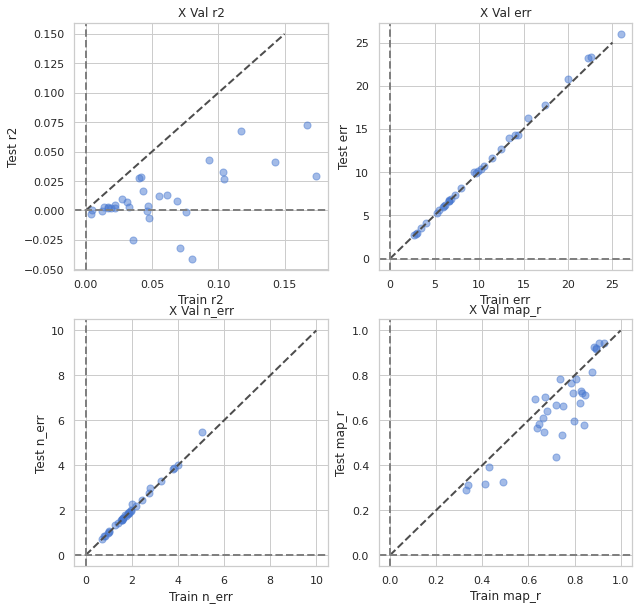

In [725]:
feat_type = 'pca'
data_type = 'fr'
print(f" Feature Type: {feat_type} \n Data Type: {data_type}")
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 25], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out[feat_type][data_type][1][metric], axis=0)
    y_var = np.nanmean(out[feat_type][data_type][2][metric], axis=0)
    
    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)

 Feature Type: nmf 
 Data Type: spikes


/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


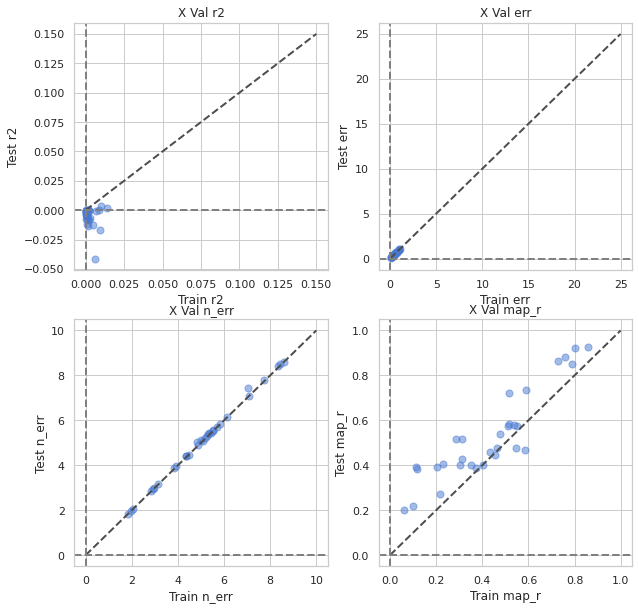

In [696]:
feat_type = 'nmf'
data_type = 'spikes'
print(f" Feature Type: {feat_type} \n Data Type: {data_type}")
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 25], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out[feat_type][data_type][1][metric], axis=0)
    y_var = np.nanmean(out[feat_type][data_type][2][metric], axis=0)
    
    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)

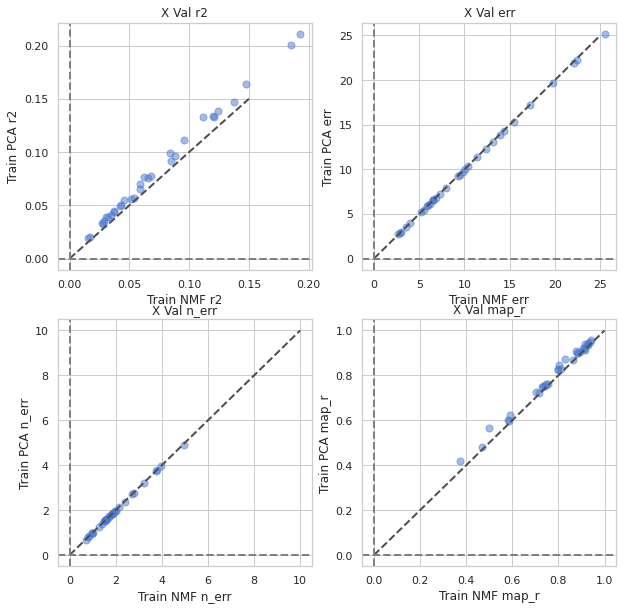

In [557]:
data_type = 'fr'
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 25], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out['nmf'][data_type][1][metric], axis=0)
    y_var = np.nanmean(out['pca'][data_type][1][metric], axis=0)

    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].set(
                xlabel="Train NMF " + metric,
                ylabel="Train PCA " + metric,
                title="X Val " + metric)

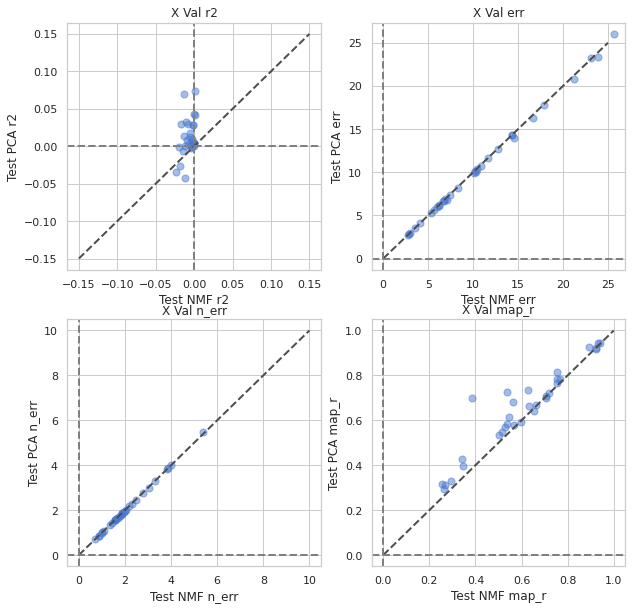

In [605]:
data_type = 'fr'

f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [-0.15, 0.15], 'err': [0, 25], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out['nmf'][data_type][2][metric], axis=0)
    y_var = np.nanmean(out['pca'][data_type][2][metric], axis=0)

    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')

    ax[ii].set(
                xlabel="Test NMF " + metric,
                ylabel="Test PCA " + metric,
                title="X Val " + metric)

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


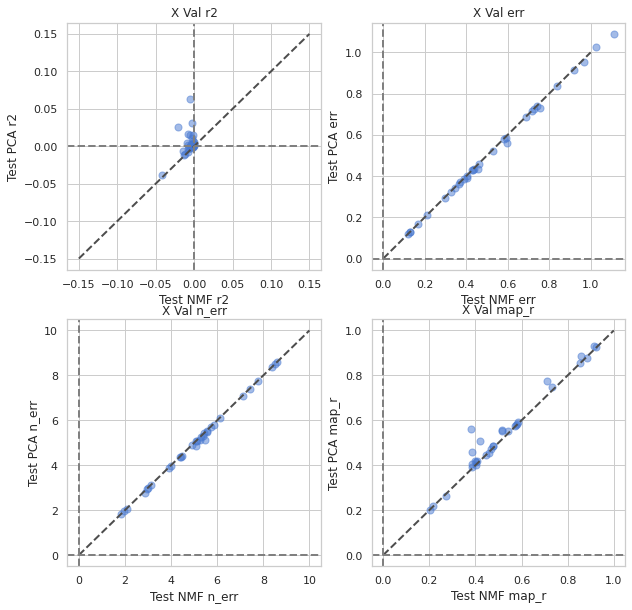

In [652]:
data_type = 'spikes'

f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [-0.15, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out['nmf'][data_type][2][metric], axis=0)
    y_var = np.nanmean(out['pca'][data_type][2][metric], axis=0)

    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')

    ax[ii].set(
                xlabel="Test NMF " + metric,
                ylabel="Test PCA " + metric,
                title="X Val " + metric)

 Feature Type: pca 
 Data Type: spikes


/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


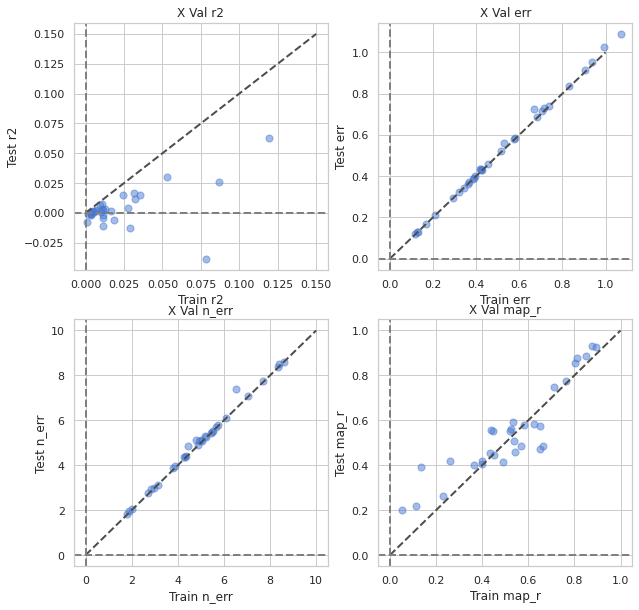

In [604]:
feat_type = 'pca'
data_type = 'spikes'
print(f" Feature Type: {feat_type} \n Data Type: {data_type}")
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out[feat_type][data_type][1][metric], axis=0)
    y_var = np.nanmean(out[feat_type][data_type][2][metric], axis=0)
    
    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].set(
                xlabel="Train " + metric,
                ylabel="Test " + metric,
                title="X Val " + metric)

 Feature pca; 'Spikes vs FR'


/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


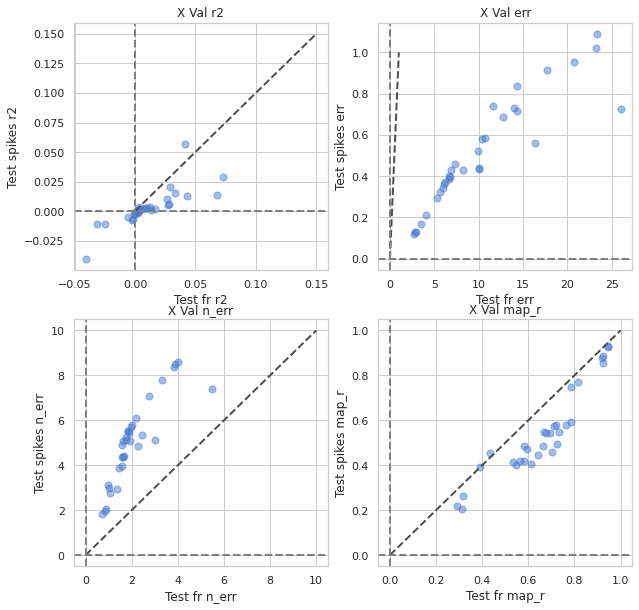

In [733]:
feat_type = 'pca'

print(f" Feature {feat_type}; 'Spikes vs FR'")
f,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
metrics = ['r2', 'err', 'n_err', 'map_r']
lims = {'r2': [0, 0.15], 'err': [0, 1], 'n_err':[0, 10], 'map_r':[0, 1] }

for ii, metric in enumerate(metrics):
    x_var = np.nanmean(out[feat_type]['fr'][2][metric], axis=0)
    y_var = np.nanmean(out[feat_type]['spikes'][2][metric], axis=0)
    
    ax[ii].scatter(x_var, y_var, s=50, alpha=0.5)
    #ax[ii].plot(ax[ii].get_xlim(), ax[0].get_ylim(), ls="--", color='k', linewidth=2)
    ax[ii].plot(lims[metric], lims[metric], linewidth=2, linestyle='--', color='0.3')
    ax[ii].axhline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].axvline(0, linewidth=2, linestyle='--', color='0.5')
    ax[ii].set(
                xlabel="Test fr " + metric,
                ylabel="Test spikes " + metric,
                title="X Val " + metric)

At least on this sessions' data, firing rate PCA features using the elastic net is consistantly better than modeling spikes with a poisson model, in all relevant metrics. 

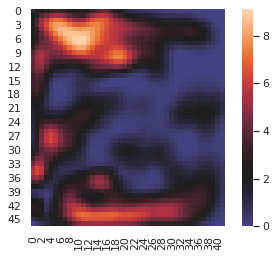

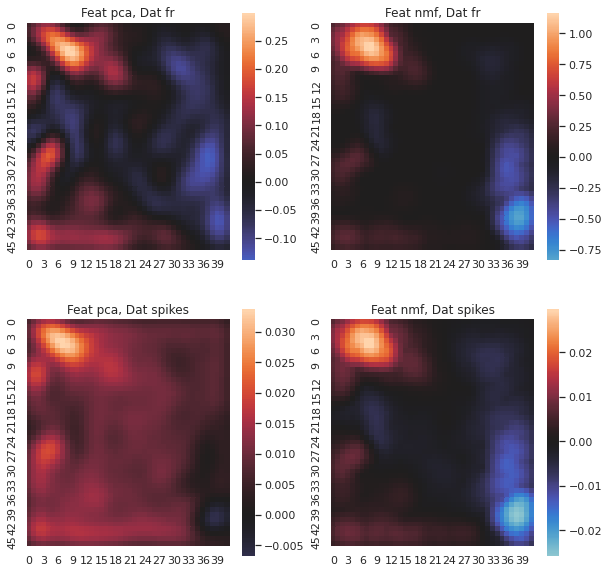

In [732]:
unit = 5

f, ax = plt.subplots()
sns.heatmap(fr_maps[unit], center=fr_maps[unit].mean(), ax=ax, square=True)

f, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()


A = np.zeros((4, 47,42))

rows = ['fr', 'spikes']
cols = ['pca', 'nmf']
cnt = 0 
for row in rows:
    for col in cols:    
        A[cnt] = np.nanmean(out[col][row][0], axis=0)[unit].reshape(47,-1)
        sns.heatmap(A[cnt], center=0, ax=ax[cnt], square=True)
        ax[cnt].set_title(f'Feat {col}, Dat {row}' )
        cnt+=1
    

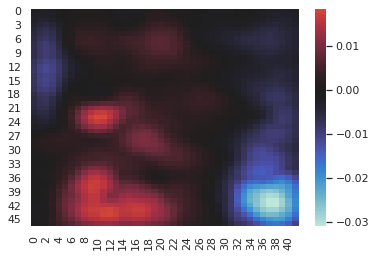

# try function with all the models:

In [746]:
%%time
spatial_funcs = reload(spatial_funcs)
sm = spatial_funcs.SpatialEncodingModels(x=of_dat.x, y=of_dat.y, speed=of_dat.sp, ha=of_dat.ha, hd=of_dat.hd, fr=fr, spikes=spikes, data_type='fr', n_jobs=-1) 

CPU times: user 29.9 ms, sys: 183 µs, total: 30.1 ms
Wall time: 29.4 ms


In [747]:
sm.get_all_models()

Speed Model Completed: 2.55s
Head Dir Model Completed: 2.39s
Head Ang Model Completed: 2.40s
Border Model Completed: 1.60s
Grid Model Completed: 40.52s
Spatial Stability Model Completed: 8.64s


,unit_id,metric,value,split,model
0,0,r2,0.0403254,train,speed
1,1,r2,0.0140092,train,speed
2,2,r2,0.00355804,train,speed
3,3,r2,0.0115168,train,speed
4,4,r2,0.0588106,train,speed
5,5,r2,0.00709928,train,speed
6,6,r2,0.0163296,train,speed
7,7,r2,0.0212977,train,speed
8,8,r2,0.00336655,train,speed
9,9,r2,0.00377996,train,speed


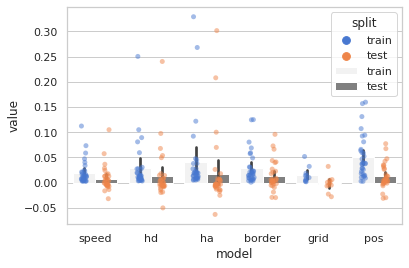

In [767]:
metric = 'r2'
sns.boxplot(data=sm.all_models[sm.all_models['metric']==metric], x='model', y='value', hue='split', color='white')
sns.stripplot(data=sm.all_models[sm.all_models['metric']==metric], x='model', y='value', hue='split',dodge=True, alpha=0.5)

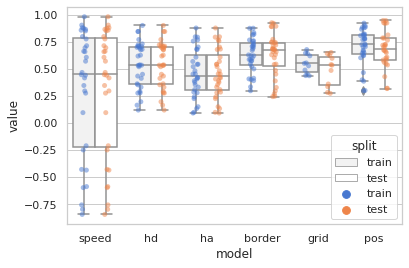

In [768]:
metric = 'map_r'
sns.boxplot(data=sm.all_models[sm.all_models['metric']==metric], x='model', y='value', hue='split', color='white')
sns.stripplot(data=sm.all_models[sm.all_models['metric']==metric], x='model', y='value', hue='split',dodge=True, alpha=0.5)